 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [166]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [167]:
# Reading whale returns
csv_path_whale = Path("./Resources/whale_returns.csv")
whale_daily_df = pd.read_csv(csv_path_whale)



whale_daily_df.set_index(pd.to_datetime(whale_daily_df['Date'], infer_datetime_format = True), inplace = True)
whale_daily_df.drop(columns = ["Date"], inplace = True)

whale_daily_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [168]:
# Count nulls
whale_daily_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [169]:
# Drop nulls
whale_daily_df = whale_daily_df.dropna().copy()

whale_daily_df.isnull().sum()




SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [170]:
# Reading algorithmic returns

csv_path_algo = Path("./Resources/algo_returns.csv")
algo_daily_df = pd.read_csv(csv_path_algo)

algo_daily_df.set_index(pd.to_datetime(algo_daily_df['Date'], infer_datetime_format = True),inplace = True)
algo_daily_df.drop(columns = ["Date"], inplace = True)

algo_daily_df.head()



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [171]:
# Count nulls
algo_daily_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [172]:
# Drop nulls
algo_daily_df = algo_daily_df.dropna().copy()

algo_daily_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [173]:
# Reading S&P 500 Closing Prices

csv_path_sp500 = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(csv_path_sp500)

sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format = True), inplace = True)

sp500_history_df.drop(columns = ["Date"], inplace = True)

sp500_history_df = sp500_history_df.sort_index()



sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [174]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [175]:
# Fix Data Types

# Drops "$" from Close column

sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$', '', regex = False)

# Converts close column from object to float

sp500_history_df["Close"] = sp500_history_df["Close"].astype('float')
sp500_history_df.dtypes




Close    float64
dtype: object

In [176]:
# Calculate Daily Returns

sp500_daily_return_df = sp500_history_df.pct_change()

sp500_daily_return_df




,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [177]:
# Drop nulls

sp500_daily_return_df = sp500_daily_return_df.dropna().copy()

sp500_daily_return_df.isnull().sum()


Close    0
dtype: int64

In [178]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_return_df = sp500_daily_return_df.rename(columns = {"Close":"SP 500"})

sp500_daily_return_df.head()


,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [179]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

all_portfolios_df = pd.concat([whale_daily_df, algo_daily_df, sp500_daily_return_df], axis = "columns", join = "inner")

all_portfolios_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily for Returns for Portfolios and S&P'}, xlabel='Date'>

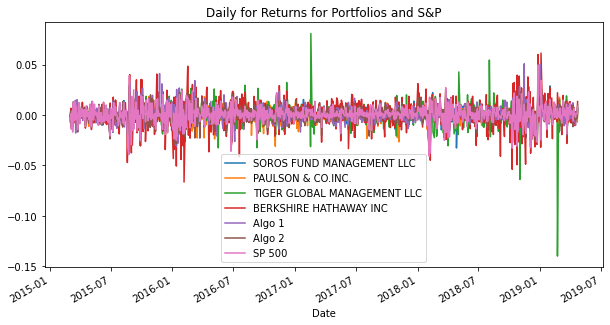

In [180]:
# Plot daily returns of all portfolios
all_portfolios_df.plot(title = "Daily for Returns for Portfolios and S&P", figsize = (10,5))



#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-16                     0.862080                1.526861  1.944990   
2019-04-17                     0.858279                1.531781  1.924954   
2019-04-18                     0.858778                1.534716  1.923823   
2019-04-22                     0.855652                1.533046  1.925124   
2019-04-23                     0.861189                1.553401  1.934691   

              Algo 2    SP 500  

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

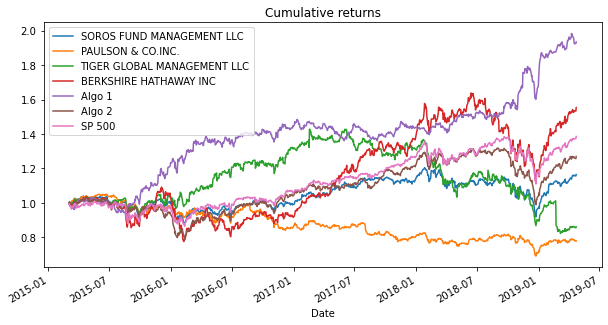

In [219]:
# Calculate cumulative returns of all portfolios

cumulative_return = (1+all_portfolios_df).cumprod()
print(cumulative_return.tail())

# Plot cumulative returns

cumulative_return.plot(title = "Cumulative returns", figsize=(10,5))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

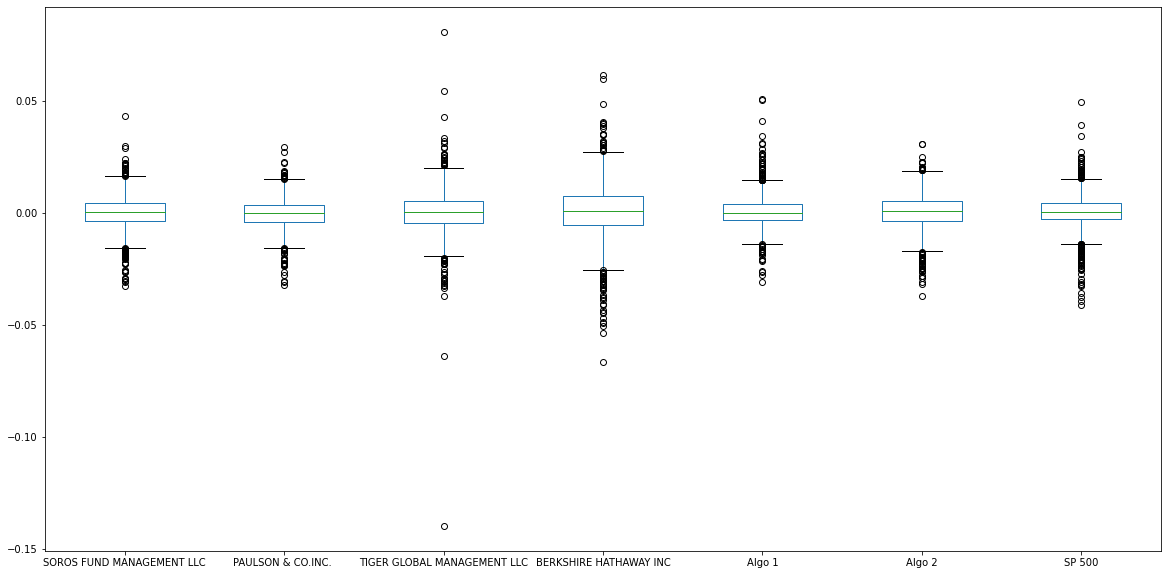

In [182]:
# Box plot to visually show risk

all_portfolios_df.plot(kind = "box", figsize =(20,10))

### Calculate Standard Deviations

In [183]:
# Calculate the daily standard deviations of all portfolios

all_portfolios_df_sdev = all_portfolios_df.iloc[0:,0:6]


all_portfolios_df_sdev = all_portfolios_df_sdev.std(ddof = 1)

all_portfolios_df_sdev


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [195]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_return_df_std = all_portfolios_df.iloc[0:,-1:]

sp500_daily_return_df_std = sp500_daily_return_df_std.std(ddof = 1)
print(sp500_daily_return_df_std)

# Determine which portfolios are riskier than the S&P 500

for portfolios in all_portfolios_df_sdev:
    if portfolios > sp500_daily_return_df_std.item():
        print(f" {portfolios} is more risky than S&P 500")


    

SP 500    0.008554
dtype: float64
 0.010893969618743005 is more risky than S&P 500
 0.012918618441883491 is more risky than S&P 500


### Calculate the Annualized Standard Deviation

In [213]:
# Calculate the annualized standard deviation (252 trading days)

all_portfolio_annual_std = (all_portfolios_df.std())*(252**.5)

all_portfolio_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

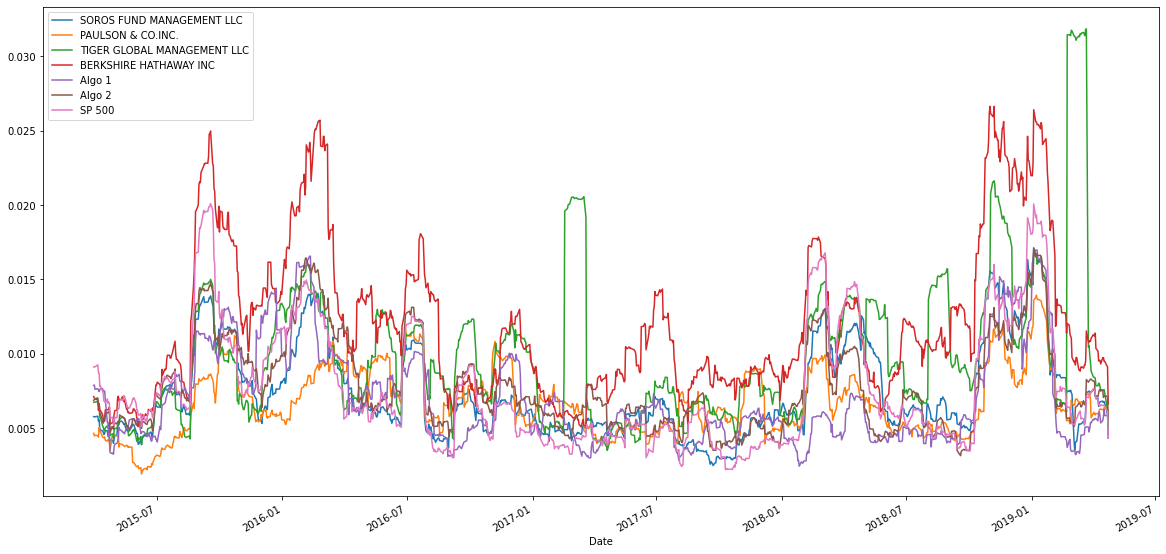

In [186]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

all_portfolios_rolling_std = all_portfolios_df.rolling(21).std()
all_portfolios_rolling_std.head(25)

# Plot the rolling standard deviation

all_portfolios_rolling_std.plot(figsize = (20,10))


### Calculate and plot the correlation

In [187]:
# Calculate the correlation
all_portfolio_correlation = all_portfolios_df.corr()

# Display de correlation matrix
all_portfolio_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

1.821774999163274e-05
7.316632424648712e-05
0.24899091459425635


<AxesSubplot:xlabel='Date'>

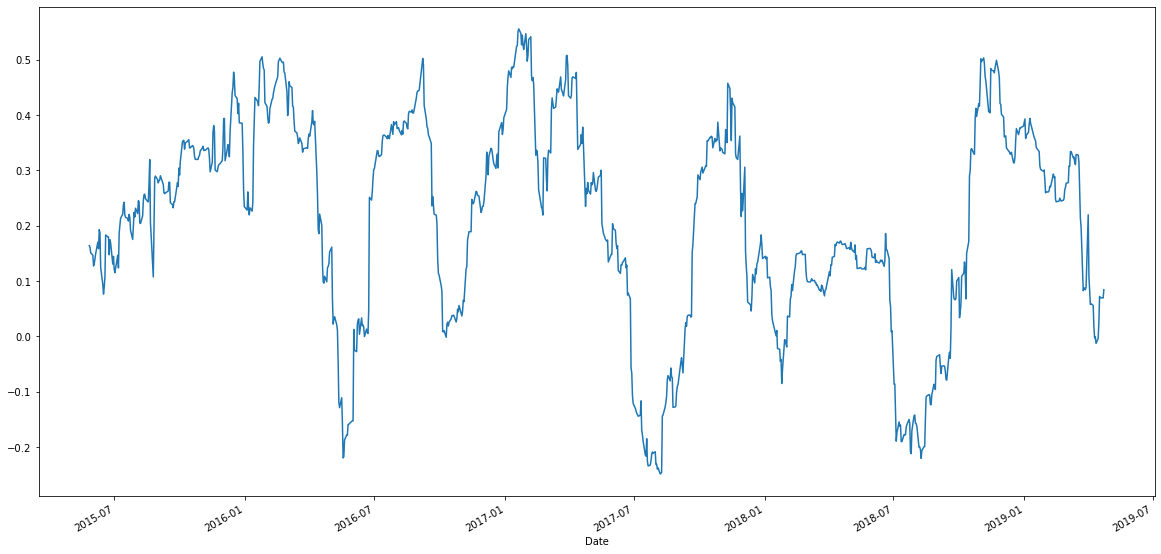

In [191]:
# Calculate covariance of a single portfolio
algo1_covar = all_portfolios_df.iloc[0:,4].cov(all_portfolios_df.iloc[0:,6])
print(algo1_covar)

# Calculate variance of S&P 500
variance = all_portfolios_df.iloc[0:,6].var()
print(variance)

# Computing beta
beta = algo1_covar/variance
print(beta)

# Plot beta trend
rolling_covariance = all_portfolios_df['Algo 1'].rolling(window=60).cov(all_portfolios_df["SP 500"].rolling(window=60))
rolling_variance = all_portfolios_df['SP 500'].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance

rolling_beta.plot(figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [147]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [215]:
# Annualized Sharpe Ratios

sharpe_ratios = (all_portfolios_df.mean()* 252) / all_portfolio_annual_std
print(sharpe_ratios)


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64


<AxesSubplot:>

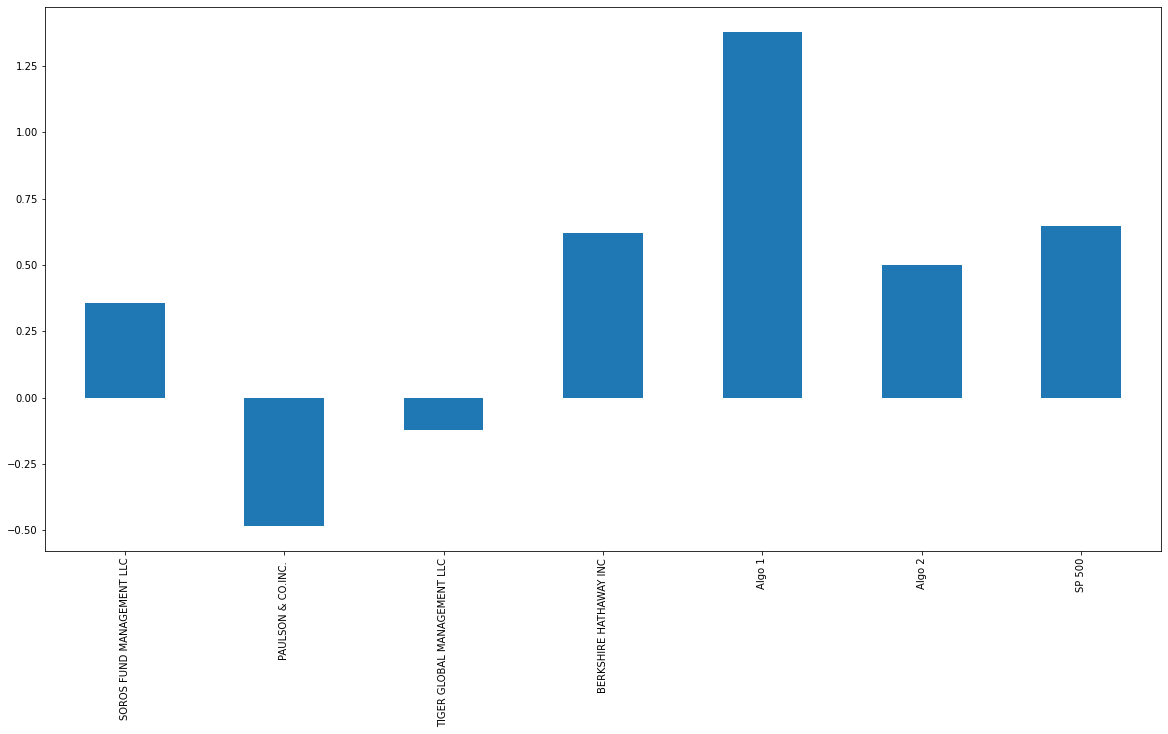

In [217]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", figsize = (20,10))

In [ ]:
### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

-dfsafdfsa--

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame



In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!